In [48]:
import pandas as pd
import numpy as np

import optuna

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style(style="darkgrid")

In [51]:
main_df = pd.read_csv("./data/winequality-white.csv", sep=";")
main_df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [52]:
main_df.describe() # high level overview of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [53]:
main_df.isna().sum() # checking if any column has null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [54]:
main_df["quality"] -= main_df["quality"].min()
main_df["quality"].value_counts()

3    2198
2    1457
4     880
5     175
1     163
0      20
6       5
Name: quality, dtype: int64

<AxesSubplot:>

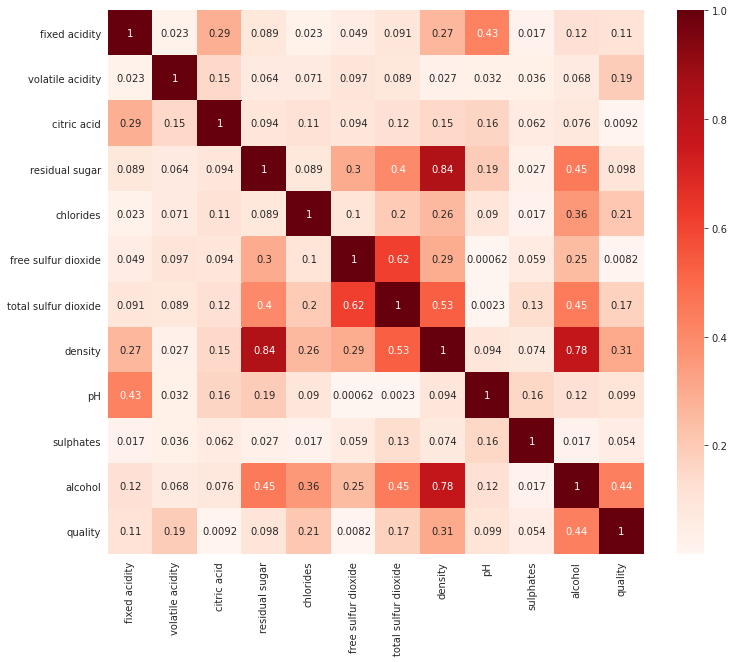

In [55]:
plt.figure(figsize=(12, 10))
sns.heatmap(abs(main_df.corr()), annot=True, cmap=plt.cm.Reds)

In [56]:
from sklearn.model_selection import train_test_split

X = main_df.drop(columns=["quality"], inplace=False)
y = main_df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=42)

I will be using the guide on https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html for selecting the algorithms.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        49
           2       0.60      0.52      0.56       437
           3       0.52      0.81      0.63       660
           4       0.50      0.09      0.16       264
           5       0.00      0.00      0.00        53
           6       0.00      0.00      0.00         1

    accuracy                           0.54      1470
   macro avg       0.23      0.20      0.19      1470
weighted avg       0.50      0.54      0.48      1470



/home/atakan/anaconda3/envs/kaggle-classification/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

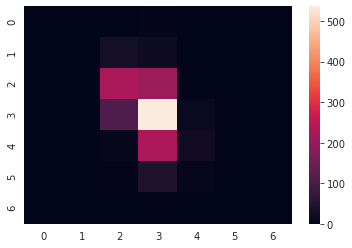

In [57]:
from sklearn.svm import LinearSVC

l_svc = make_pipeline(StandardScaler(), LinearSVC(dual=False, random_state=42)) # dual = False when n_attributes > n_classes
l_svc.fit(X_train, y_train)

l_svc_pred = l_svc.predict(X_test)

print(classification_report(y_test, l_svc_pred))

l_svc_cfm = confusion_matrix(y_test, l_svc_pred)
sns.heatmap(l_svc_cfm)

### K-Nearest Neighbors


weights="distance" because it has better accuracy then "uniform"<br>

<AxesSubplot:title={'center':'Elbow Method for Optimal K'}, xlabel='number of neighbors', ylabel='error %'>

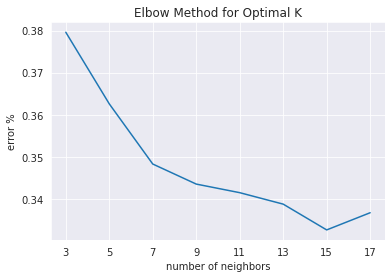

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn_elbow_dict = {}

for i in range(3, 19, 2):
    knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i ,weights="distance"))
    knn.fit(X_train, y_train)

    knn_elbow_dict[i] = (1 - knn.score(X_test, y_test))

plt.title("Elbow Method for Optimal K")
plt.xlabel("number of neighbors")
plt.ylabel("error %")
plt.xticks(list(range(3, 19, 2)))
sns.lineplot(data=knn_elbow_dict)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.53      0.20      0.29        49
           2       0.68      0.65      0.67       437
           3       0.65      0.72      0.68       660
           4       0.62      0.61      0.62       264
           5       0.68      0.49      0.57        53
           6       0.00      0.00      0.00         1

    accuracy                           0.65      1470
   macro avg       0.45      0.38      0.40      1470
weighted avg       0.65      0.65      0.65      1470



/home/atakan/anaconda3/envs/kaggle-classification/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

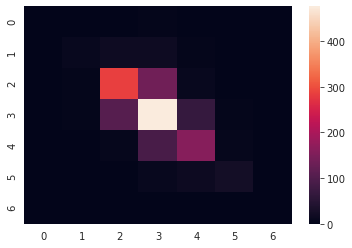

In [59]:
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=7, weights="distance"))
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

print(classification_report(y_test, knn_pred))

knn_cfm = confusion_matrix(y_test, knn_pred)
sns.heatmap(knn_cfm)

### Support Vector Classification

kernel="rbf" because it has the highest accuracy.<br>
decision_function_shape = "ovo" because it is multi-class classification. (sklearn-docs)<br>

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.02      0.04        49
           2       0.61      0.58      0.59       437
           3       0.54      0.78      0.64       660
           4       0.65      0.27      0.38       264
           5       0.00      0.00      0.00        53
           6       0.00      0.00      0.00         1

    accuracy                           0.57      1470
   macro avg       0.40      0.23      0.24      1470
weighted avg       0.57      0.57      0.53      1470



/home/atakan/anaconda3/envs/kaggle-classification/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

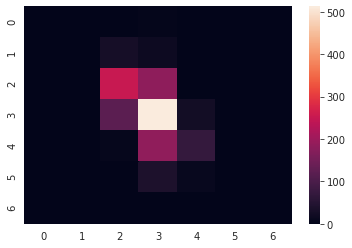

In [60]:
from sklearn.svm import SVC

svc = make_pipeline(StandardScaler(), SVC(kernel="rbf", decision_function_shape="ovo", random_state=42))
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

print(classification_report(y_test, svc_pred))

svc_cfm = confusion_matrix(y_test, svc_pred)
sns.heatmap(svc_cfm)

### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.62      0.20      0.31        49
           2       0.72      0.70      0.71       437
           3       0.65      0.80      0.71       660
           4       0.68      0.48      0.57       264
           5       0.93      0.47      0.62        53
           6       0.00      0.00      0.00         1

    accuracy                           0.68      1470
   macro avg       0.51      0.38      0.42      1470
weighted avg       0.68      0.68      0.67      1470



/home/atakan/anaconda3/envs/kaggle-classification/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

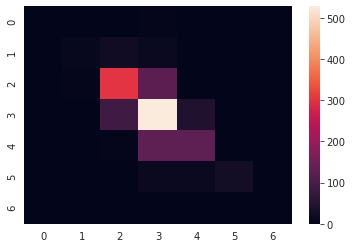

In [61]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42))
random_forest_classifier.fit(X_train, y_train)

rfc_pred = random_forest_classifier.predict(X_test)

print(classification_report(y_test, rfc_pred))

rfc_cfm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(rfc_cfm)

### XGBoost

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.46      0.22      0.30        49
           2       0.70      0.65      0.67       437
           3       0.65      0.76      0.70       660
           4       0.61      0.51      0.56       264
           5       0.69      0.45      0.55        53
           6       0.00      0.00      0.00         1

    accuracy                           0.65      1470
   macro avg       0.44      0.37      0.40      1470
weighted avg       0.65      0.65      0.64      1470



/home/atakan/anaconda3/envs/kaggle-classification/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

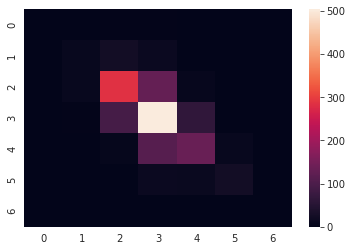

In [62]:
from xgboost import XGBClassifier

xgb = make_pipeline(StandardScaler(), XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42))
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

print(classification_report(y_test, xgb_pred))

xgb_cfm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(xgb_cfm)

In [63]:
from xgboost import XGBRegressor

xgb_r = XGBRegressor(random_state=42)
xgb_r.fit(X_train, y_train)

xgb_r.score(X_test, y_test)

0.45810167403254853

### Light GBM

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.52      0.22      0.31        49
           2       0.69      0.67      0.68       437
           3       0.64      0.76      0.70       660
           4       0.63      0.50      0.56       264
           5       0.80      0.45      0.58        53
           6       0.00      0.00      0.00         1

    accuracy                           0.66      1470
   macro avg       0.47      0.37      0.40      1470
weighted avg       0.65      0.66      0.65      1470



/home/atakan/anaconda3/envs/kaggle-classification/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

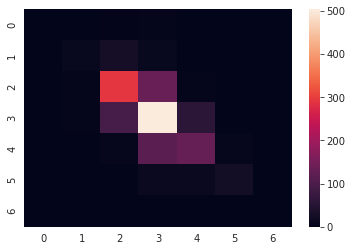

In [64]:
from lightgbm import LGBMClassifier

lgbm = make_pipeline(StandardScaler(), LGBMClassifier(random_state=42))
lgbm.fit(X_train, y_train)

lgbm_pred = lgbm.predict(X_test)

print(classification_report(y_test, lgbm_pred))

lgbm_cfm = confusion_matrix(y_test, lgbm_pred)
sns.heatmap(lgbm_cfm)

In [65]:
from lightgbm import LGBMRegressor

lgbm_r = LGBMRegressor(random_state=42)
lgbm_r.fit(X_train, y_train)

lgbm_r.score(X_test, y_test)

0.4814288987217278